<a href="https://colab.research.google.com/github/vifirsanova/compling/blob/main/tasks/task2_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Критерии оценивания:

1. произведена сегментация на уровне предложений (1 балл)
2. произведена сегментация на уровне N-грамм (1 балл)
3. произведена сегментация на уровне слов (1 балл)
4. датасет опубликован на HF Datasets (1 балл)
5. оформлена карточка на HF Datasets (1 балл)
6. в карточке представлена информация о проведенном анализе (3 балла)
7. в карточке представлен частотный анализ слов в виде графика (1 балл)
8. в карточке представлен частотный анализ слов в виде облака (1 балл)

**В комментариях к блокноту нужно обязательно добавить ссылку на ваш датасет**

# Задача 2: Разметка датасета с HF Datasets: статистический анализ и визуализация


    датасет опубликован на HF Datasets (1 балл)
    оформлена карточка на HF Datasets (1 балл)
    в карточке представлена информация о распределении длин предложений (1 балл)
    в карточке представлена информация о распределении длин N-грамм (1 балл)
    в карточке представлена информация о распределении длин слов (1 балл)
    в карточке представлен частотный анализ слов в виде графика (1 балл)
    в карточке представлен частотный анализ слов в виде облака (1 балл)


**Шаг 1**: Установка необходимых библиотек и загрузка текста

In [1]:
# Устанавливаем необходимые библиотеки
!pip install datasets nltk spacy -q

In [2]:
# Загружаем Spacy
!pip install spacy
import spacy
!python -m spacy download en_core_web_sm -q
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
# Подключаем ресурсы NLTK
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Задание**: загрузите текст для разметки

**Опции**:
1. использовать свой текст
2. использовать текст из задания 1: `https://github.com/vifirsanova/compling/blob/main/tasks/task1/data.txt`

In [4]:
# Подключаем необходимые библиотеки
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
### ваш код здесь ###
!wget http://hca.gilead.org.il/vt/li_merma.txt
with open("li_merma.txt", "r", encoding="utf-8") as file:
    text_raw=file.read()

--2025-02-19 13:07:12--  http://hca.gilead.org.il/vt/li_merma.txt
Resolving hca.gilead.org.il (hca.gilead.org.il)... 152.19.134.41
Connecting to hca.gilead.org.il (hca.gilead.org.il)|152.19.134.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50061 (49K) [text/plain]
Saving to: ‘li_merma.txt.7’

li_merma.txt.7      100%[===================>]  48.89K  --.-KB/s    in 0.03s   

2025-02-19 13:07:12 (1.58 MB/s) - ‘li_merma.txt.7’ saved [50061/50061]



**Шаг 2**: сегментация

Вы можете использовать любые библиотеки

In [6]:
# выполните здесь код для сегментации на уровне предложений
# выполните здесь код для сегментации на уровне слов
# выполните здесь код для сегментации на биграмм


# Сегментация на предложения (сразу удаляем '\n\n')
def segment_sent_text(text):
  sentences = sent_tokenize(text.replace("\n", " "), language='english')
  return sentences

# Сегментация на слова
def segment_words_text(text):
  words_ = []
  stop_words = set(stopwords.words('english'))

  # приведение к lower для унификации и токенизирование по словам
  words_ = word_tokenize(text.lower())

  # Фильтруем знаки пунктуации (опционально)
  words_ = [w for w in words_ if w.isalpha()]

  # Фильтруем стоп слова (опционально)
  words_ = [w for w in words_ if w not in stop_words]

  return words_

# Сегментация на биграммы
def segment_bigrams_text(words_m):
  word_bigrams = list(ngrams(words_m, 2))
  return word_bigrams

sent_text = segment_sent_text(text_raw)
words_text = segment_words_text(text_raw)
bigrams_text = segment_bigrams_text(words_text)

print("НА УРОВНЕ ПРЕДЛОЖЕНИЙ:", sent_text)
print("НА УРОВНЕ СЛОВ:", words_text)
print("НА УРОВНЕ БИГРАММ:", bigrams_text)

НА УРОВНЕ ПРЕДЛОЖЕНИЙ: ['                                      1872                      FAIRY TALES OF HANS CHRISTIAN ANDERSEN                                THE LITTLE MERMAID                            by Hans Christian Andersen      FAR out in the ocean, where the water is as blue as the prettiest cornflower, and as clear as crystal, it is very, very deep; so deep, indeed, that no cable could fathom it: many church steeples, piled one upon another, would not reach from the ground beneath to the surface of the water above.', 'There dwell the Sea King and his subjects.', 'We must not imagine that there is nothing at the bottom of the sea but bare yellow sand.', 'No, indeed; the most singular flowers and plants grow there; the leaves and stems of which are so pliant, that the slightest agitation of the water causes them to stir as if they had life.', 'Fishes, both large and small, glide between the branches, as birds fly among the trees here upon land.', 'In the deepest spot of all, s

In [ ]:
"""

ОБРАЗЕЦ ОЖИДАЕМОГО РЕЗУЛЬТАТА ВЫДАЧИ:

- ПРОВЕРЬТЕ ВАШ РЕЗУЛЬТАТ,
- СРАВНИТЕ ЕГО С ОБРАЗЦОМ ПЕРЕД СДАЧЕЙ РАБОТЫ

"""

НА УРОВНЕ ПРЕДЛОЖЕНИЙ:
['Your sample text goes here', 'Replace this string with your dataset or a larger text corpus']

НА УРОВНЕ СЛОВ:
['your', 'sample', 'text', 'goes', 'here', 'replace', 'this', 'string', 'with', 'your', 'dataset', 'or', 'a', 'larger', 'text', 'corpus']

НА УРОВНЕ БИГРАММ:
[('your', 'sample'), ('sample', 'text'), ('text', 'goes'), ('goes', 'here'), ('here', 'replace'), ('replace', 'this'), ('this', 'string'), ('string', 'with'), ('with', 'your'), ('your', 'dataset'), ('dataset', 'or'), ('or', 'a'), ('a', 'larger'), ('larger', 'text'), ('text', 'corpus')]


Далее вы должны самостоятельно принять решение о том, как должен выглядеть ваш датафрейм

В датафрейме вы должны представить 3 типа сегментации текста

Используйте pandas, чтобы оформить свой датасет

In [7]:
# ваш код здесь
# Создаем DataFrame

rows = []
for sent in sent_text:
    # Сегментация на слова
    words = segment_words_text(sent)

    # Сегментация на биграммы
    bigrams_ = segment_bigrams_text(words)

    rows.append({
        "sentence": sent,    # Само предложение
        "words": words,      # Список слов, полученных из этого предложения
        "bigrams": bigrams_    # Список биграмм
    })

# Формируем DataFrame
df_sentences = pd.DataFrame(rows)

# Смотрим, что получилось
df_sentences


,sentence,words,bigrams
0,1872 ...,"[fairy, tales, hans, christian, andersen, litt...","[(fairy, tales), (tales, hans), (hans, christi..."
1,There dwell the Sea King and his subjects.,"[dwell, sea, king, subjects]","[(dwell, sea), (sea, king), (king, subjects)]"
2,We must not imagine that there is nothing at t...,"[must, imagine, nothing, bottom, sea, bare, ye...","[(must, imagine), (imagine, nothing), (nothing..."
3,"No, indeed; the most singular flowers and plan...","[indeed, singular, flowers, plants, grow, leav...","[(indeed, singular), (singular, flowers), (flo..."
4,"Fishes, both large and small, glide between th...","[fishes, large, small, glide, branches, birds,...","[(fishes, large), (large, small), (small, glid..."
...,...,...,...
328,"""And we may even get there sooner,"" whispered ...","[may, even, get, sooner, whispered, one, compa...","[(may, even), (even, get), (get, sooner), (soo..."
329,"""Unseen we can enter the houses of men, where ...","[unseen, enter, houses, men, children, every, ...","[(unseen, enter), (enter, houses), (houses, me..."
330,"The child does not know, when we fly through t...","[child, know, fly, room, smile, joy, good, con...","[(child, know), (know, fly), (fly, room), (roo..."
331,"But when we see a naughty or a wicked child, w...","[see, naughty, wicked, child, shed, tears, sor...","[(see, naughty), (naughty, wicked), (wicked, c..."


**Шаг 3**:

1. произведите любые 3 типа статистического анализа, используйте образцы ниже
2. опишите, какую информацию вы можете получить на основе проведенного анализа
3. далее: оформите результаты вашего анализа в карточке датасета

**1. Анализ уникальности данных**

- **Доля уникальных слов:** Рассчитать процент уникальных слов в корпусе.
- **Коэффициент лексического разнообразия (Type-Token Ratio, TTR):** Отношение числа уникальных слов к общему количеству слов.

```python
unique_words = set(words)
lexical_diversity = len(unique_words) / len(words)
```

**2. Анализ биграмм и триграмм**
- Построить частотное распределение биграмм и триграмм.
- Выделить наиболее часто встречающиеся сочетания.

```python
trigrams = list(ngrams(words, 3))
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)
```

**3. Анализ распределений**

- Построить гистограммы для:
  - Длин предложений.
  - Длин слов.
  - Длин n-грамм.
- Вычислить медиану, стандартное отклонение, и квартили для распределений.

```python
import numpy as np

mean_sentence_length = np.mean(sentence_lengths)
std_sentence_length = np.std(sentence_lengths)
median_sentence_length = np.median(sentence_lengths)
quartiles_sentence_length = np.percentile(sentence_lengths, [25, 50, 75])
```

**4. Анализ частоты POS-тегов**

Использовать библиотеку `spacy` для разметки текста на части речи (POS tagging) и выделения наиболее часто встречающихся POS-тегов.

```python
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(data)
pos_counts = Counter([token.pos_ for token in doc])
```

**5. Анализ семантического поля**

- Использовать WordNet из `nltk` для анализа семантической близости между словами.
- Построить семантическую сеть, выделив связанные слова и частотные значения.

```python
from nltk.corpus import wordnet

synonyms = []
for word in unique_words:
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
```

**6. Анализ совместной встречаемости**
- Создать матрицу ко-частотности слов для анализа совместного появления терминов.

```python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(sentences)
co_occurrence_matrix = (X.T * X).toarray()
```

**7. TF-IDF**

Рассчитать значения TF-IDF для слов, чтобы определить важные термины в тексте.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)
feature_names = tfidf_vectorizer.get_feature_names_out()
```

In [8]:
# ваш код здесь

# Частотность слов
word_counts = Counter(words_text)
print("Топ 5 самых частых слов:")
print(word_counts.most_common(5))

# Анализ уникальности слов
unique_words = set(words_text)
lexical_diversity = len(unique_words) / len(words_text)

print(f"Число уникальных слов: {len(unique_words)}")
print(f"Общее число слов: {len(words_text)}")
print(f"Коэффициент лексического разнообразия (TTR): {lexical_diversity:.3f}")

# Биграммы мы уже вычислили
bigram_counts = Counter(bigrams_text)
print("Топ 5 самых частотных биграмм:")
print(bigram_counts.most_common(5))

# Триграммы
trigrams_text = list(ngrams(words_text, 3))
trigram_counts = Counter(trigrams_text)
print("Топ 5 самых частотных триграмм:")
print(trigram_counts.most_common(5))

# Подсчитаем длину предложений в словах (или в символах)
sentence_lengths = [len(word_tokenize(sent)) for sent in sent_text]
mean_sentence_length = np.mean(sentence_lengths)
std_sentence_length = np.std(sentence_lengths)
median_sentence_length = np.median(sentence_lengths)
quartiles_sentence_length = np.percentile(sentence_lengths, [25, 50, 75])

print(f"Средняя длина предложения (в словах): {mean_sentence_length:.2f}")
print(f"Ст. отклонение: {std_sentence_length:.2f}")
print(f"Медиана: {median_sentence_length:.2f}")
print(f"Квартали (25%, 50%, 75%): {quartiles_sentence_length}")

Топ 5 самых частых слов:
[('little', 65), ('sea', 60), ('mermaid', 50), ('prince', 50), ('could', 46)]
Число уникальных слов: 1436
Общее число слов: 4208
Коэффициент лексического разнообразия (TTR): 0.341
Топ 5 самых частотных биграмм:
[(('little', 'mermaid'), 43), (('immortal', 'soul'), 13), (('human', 'beings'), 11), (('said', 'little'), 7), (('young', 'prince'), 7)]
Топ 5 самых частотных триграмм:
[(('three', 'hundred', 'years'), 7), (('said', 'little', 'mermaid'), 6), (('hans', 'christian', 'andersen'), 2), (('beautiful', 'marble', 'statue'), 2), (('reached', 'fifteenth', 'year'), 2)]
Средняя длина предложения (в словах): 31.65
Ст. отклонение: 16.33
Медиана: 28.00
Квартали (25%, 50%, 75%): [20. 28. 40.]


**Шаг 4**: визуализируйте данные по образцу

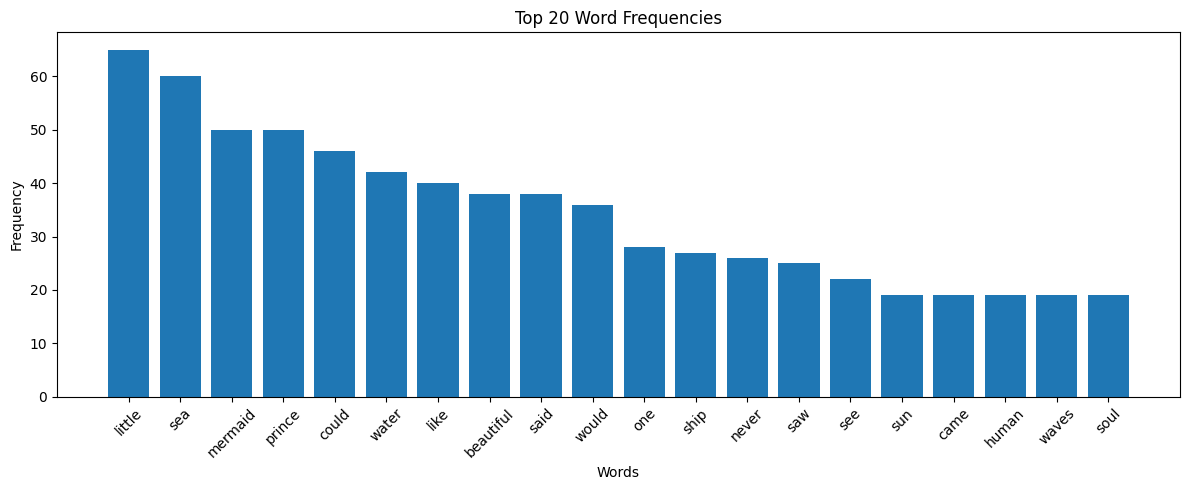

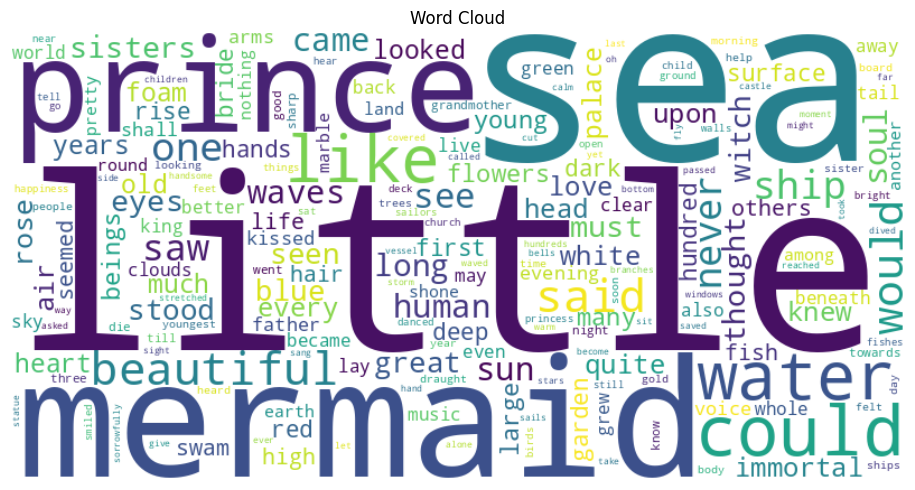

In [9]:
# Word Frequency Plot
word_counts = Counter(words_text)

plt.figure(figsize=(12, 5))
plt.bar(*zip(*word_counts.most_common(20)))
plt.title("Top 20 Word Frequencies")
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("word_frequency_plot.png")
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.tight_layout()
plt.savefig("word_cloud.png")
plt.show()

**Шаг 5**: отправляем на HF Datasets сегментированные данные и оформляем карточку

Что должно быть представлено в карточке:

- результат статистического анализа 3-х типов
- выводы по проведенному анализу
  - какой анализ был проведен?
  - в чем заключается основная идея этого анализа и зачем он нужен?
  - какие тренды удалось выявить?
- гистограмма
- облако слов

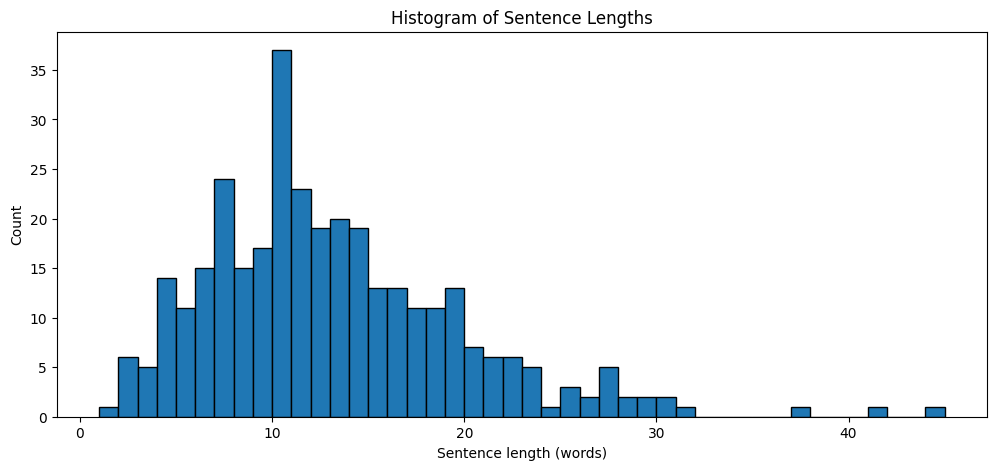

In [11]:
# В колонке "words" у нас список слов для каждого предложения
lengths = df_sentences['words'].apply(len)

plt.figure(figsize=(12, 5))
# Зададим диапазон бинов от 1 до максимальной длины + 2
plt.hist(lengths, bins=range(1, max(lengths) + 2), edgecolor='black')
plt.xlabel('Sentence length (words)')
plt.ylabel('Count')
plt.title('Histogram of Sentence Lengths')
plt.show()

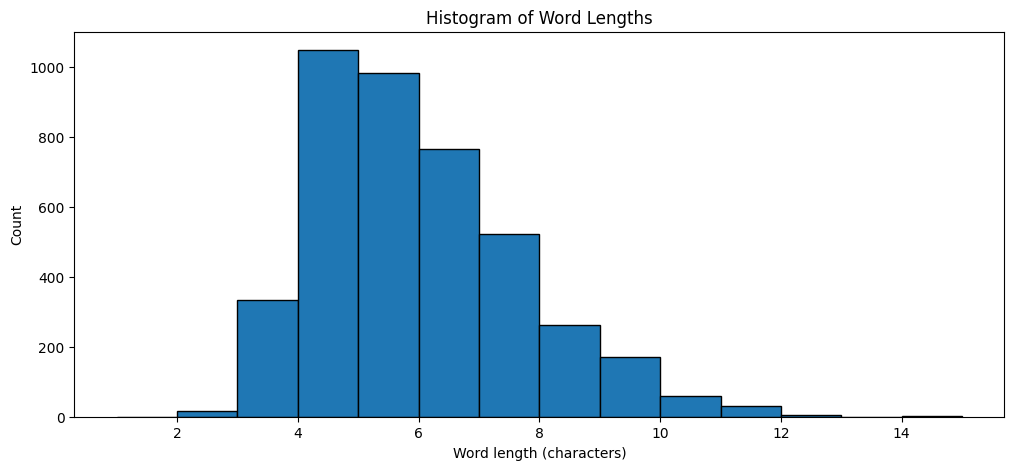

In [12]:
# Собираем все слова воедино
lengths_of_words = [len(w) for w in words_text]

plt.figure(figsize=(12, 5))
plt.hist(lengths_of_words, bins=range(1, max(lengths_of_words)+2), edgecolor='black')
plt.xlabel('Word length (characters)')
plt.ylabel('Count')
plt.title('Histogram of Word Lengths')
plt.show()

**Мой датасет:**
https://huggingface.co/datasets/nataliaprsd/little_mermaid_stat

In [73]:
# Создаем датасет
from datasets import Dataset
dataset = Dataset.from_pandas(df_sentences)

# Публикация датасета
# Замените 'your_dataset_name' на имя вашего датасета и добавьте токен.
dataset.push_to_hub("little_mermaid_stat", token="XXXXXXXX") #ради безопасности токен скрыт

# просмотр результатов
dataset

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/365 [00:00<?, ?B/s]

Dataset({
    features: ['sentence', 'words', 'bigrams'],
    num_rows: 333
})

**Мой датасет:**
https://huggingface.co/datasets/nataliaprsd/little_mermaid_stat